## Part 2: Modeling Instructions

The online school has provided new data about the daily activities of each student on their learning platform, how early or late they completed each assessment, and which courses they were taking.  However, this has caused the data table to have over 900 columns.

They would now like you to use this data to predict which students will pass the course and which will fail.

passed_course is your target variable

### Load Data

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
path = '/Users/iairlinker/Documents/repos/coding_dojo_challenge/data/raw/modeling.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(12737, 931)


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


### Processed before modeling

In [3]:
numerical_columns = identify_numerical_columns(df)
len(numerical_columns)

931

In [4]:
binary_columns = identify_binary_columns(df)
len(binary_columns)
binary_columns

['gender',
 'disability',
 'passed_course',
 'module_0',
 'module_AAA',
 'module_BBB',
 'module_CCC',
 'module_DDD',
 'module_EEE',
 'module_FFF',
 'module_GGG',
 'presentation_0',
 'presentation_2013B',
 'presentation_2013J',
 'presentation_2014B',
 'presentation_2014J']

In [5]:
max_unique_values = 30
filtered_columns = identify_columns_by_unique_values(df, max_unique_values)
print(len(filtered_columns))
filtered_columns


50


['highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'assess_submitted_13',
 'assess_submitted_14',
 'sum_activities_-23',
 'sum_activities_-22',
 'sum_activities_-21',
 'sum_activities_-20',
 'sum_activities_-19',
 'sum_activities_243',
 'sum_activities_244',
 'sum_activities_245',
 'sum_activities_246',
 'sum_activities_247',
 'sum_activities_248',
 'sum_activities_249',
 'sum_activities_250',
 'sum_activities_251',
 'sum_activities_252',
 'sum_click_252',
 'sum_activities_253',
 'sum_click_253',
 'sum_activities_254',
 'sum_activities_255',
 'sum_activities_256',
 'sum_click_256',
 'sum_activities_257',
 'sum_click_257',
 'sum_activities_258',
 'sum_click_258',
 'sum_activities_259',
 'sum_click_259',
 'sum_activities_260',
 'sum_click_260',
 'sum_activities_261',
 'sum_activities_262',
 'sum_click_262',
 'sum_activities_263',
 'sum_click_263',
 'sum_activities_264',
 'sum_activities_265',
 'sum_click_265',
 'sum_activities_266',
 'sum_click_266',
 'sum_activiti

In [6]:
ordinal_columns = ['highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts','studied_credits']
columns_to_remove = binary_columns + ordinal_columns
numerical_columns = df.drop(columns=columns_to_remove, axis=1).columns.tolist()
# i explored the unique values of the columns that were not removed to undertand the pattern in the names of thedata

In [7]:
df['assess_submitted_1'].unique()

array([ -1.,   3.,  -2.,   7.,   1.,   0.,   2.,  -3.,  -4.,   4.,  18.,
        -7.,  -5.,  10.,  11.,  -9., -10.,   6.,   5.,  -8.,  -6., -14.,
        14.,   8., -23.,  53., -13.,  22.,  20., -20.,  12., -22.,  47.,
        28.,   9.,  72., -11.,  13.,  29., -18., -16., -12., -15.,  19.,
       -25.,  17.,  15., -19.,  32.,  21.,  16.,  27.,  76., -17., -21.,
        35.,  31., -24.,  34.,  86.,  40., -26., -31., -28., -35., -30.,
       -27., -32.,  50.,  30., -29., -33., -49.,  87., -45.,  49., -34.,
        63.,  91., -36.,  43.,  46.,  24.,  26., -43., -42., -40., -38.,
       -39., -61.,  52., -44.])

In [8]:
df['assess_score_6'].unique()

array([  0.,  53.,  60.,  72., 100.,  82.,  67.,  92.,  80.,  90.,  57.,
        77.,  74.,  62.,  85.,  71.,  69.,  65.,  56.,  55.,  75.,  66.,
        70.,  79.,  86.,  78.,  83.,  40.,  50.,  35.,  84.,  87.,  46.,
        73.,  61.,  48.,  68.,  64.,  81.,  91.,  99.,  43.,  63.,  39.,
        14.,  89.,  93.,  58.,  41.,  42.,  88.,  51.,  95.,  54.,  12.,
        45.,  59.,  76.,  36.,  52.,  38.,   5.,  20.,  15.,  44.,  10.,
        37.,  47.,  94.,  49.,  34.,  11.,  96.,  23.,  97.,  25.,  33.,
        19.,   8.,  30.,  21.,  32.,  13.,   6.,  26.,  98.,  18.,  22.,
        31.,  24.,   3.,  27.,  28.,  29.,   7.,  16.,  17.,   9.,   4.])

In [9]:
df['activities_x_clicks_-20'].unique()

array([0.000e+00, 4.920e+02, 9.900e+02, 6.240e+02, 1.600e+01, 2.450e+02,
       1.190e+02, 3.050e+02, 3.380e+02, 5.500e+02, 4.770e+02, 2.000e+02,
       2.200e+01, 1.000e+00, 6.300e+02, 1.653e+03, 5.590e+02, 5.580e+02,
       3.990e+02, 5.100e+01, 8.060e+02, 9.500e+01, 2.340e+02, 1.200e+01,
       2.800e+01, 3.600e+02, 1.380e+02, 2.700e+01, 5.400e+01, 1.500e+01,
       1.100e+02, 7.500e+01, 1.800e+01, 7.560e+02, 2.000e+00, 1.650e+02,
       6.000e+01, 3.000e+00, 4.000e+00, 9.100e+01, 9.000e+00, 8.400e+01,
       2.080e+02, 6.300e+01, 4.180e+02, 2.400e+01, 1.000e+01, 6.000e+00,
       7.700e+02, 1.280e+02, 8.800e+01, 9.900e+01, 3.000e+01, 7.000e+01,
       4.400e+01, 3.600e+01, 4.070e+02, 4.000e+01, 1.344e+03, 1.400e+01,
       6.500e+01, 3.640e+02, 3.120e+02, 5.000e+01, 2.001e+03, 2.500e+01,
       3.080e+02])

In [10]:
df['sum_click_-20'].unique()

array([ 0., 41., 66., 52.,  8., 35., 17., 61., 26., 55., 53., 25., 11.,
        1., 42., 87., 43., 62., 57., 19.,  4.,  7., 36., 23., 18.,  9.,
        5., 22., 15., 84.,  2., 10.,  3.,  6., 13., 12., 38., 16., 14.,
       37., 56., 28., 24., 69.])

In [11]:
df['sum_activities_-20'].unique()

array([ 0., 12., 15.,  2.,  7.,  5., 13., 10.,  9.,  8.,  1., 19.,  3.,
        4.,  6., 11., 22., 24., 29.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='passed_course'), df['passed_course'], test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Use PCA to prepare the data for modeling.

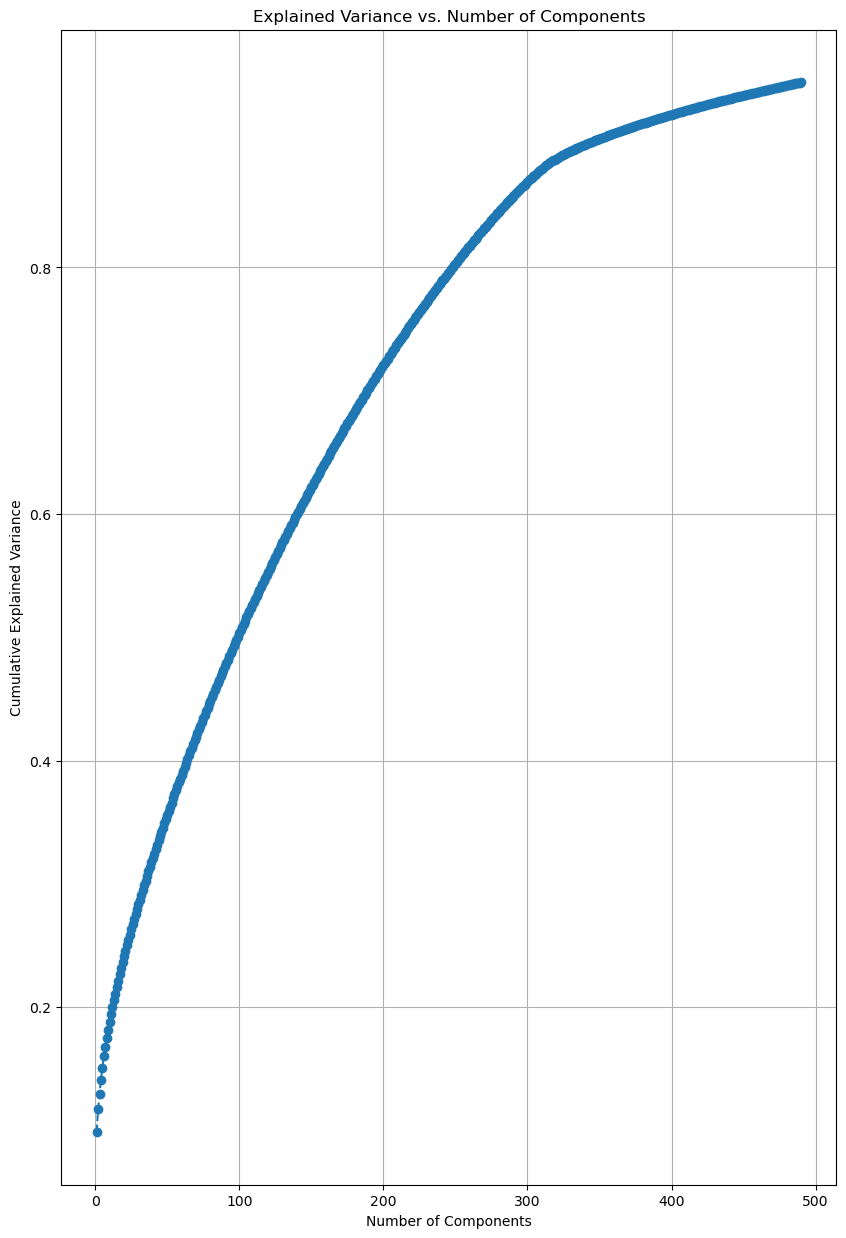

In [13]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 15))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [14]:
pca = PCA(n_components=0.9) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
n_components = pca.n_components_
print(f'Number of components that explain 95% of variance: {n_components}')

Number of components that explain 95% of variance: 341


### Use a deep learning model to predict which students will pass and which will fail

In [15]:
import torch
print(torch.__version__)
print("Is PyTorch using MPS (Apple GPU)?", torch.backends.mps.is_available())

2.4.1
Is PyTorch using MPS (Apple GPU)? True


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
class Model1(nn.Module):
    def __init__(self, input_dim):
        super(Model1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.sigmoid(self.output(x))
        return x

input_dim = X_train_pca.shape[1]
model_1 = Model1(input_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

def train_model(model, criterion, optimizer, X_train, y_train, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
train_model(model_1, criterion, optimizer, X_train_tensor, y_train_tensor)


Epoch [10/50], Loss: 0.5853
Epoch [20/50], Loss: 0.4976
Epoch [30/50], Loss: 0.4358
Epoch [40/50], Loss: 0.3890
Epoch [50/50], Loss: 0.3533


In [18]:
class Model2(nn.Module):
    def __init__(self, input_dim):
        super(Model2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.dropout = nn.Dropout(0.2)  # Dropout layer for regularization
        self.layer2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)  # Apply dropout after the first layer
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

model_2 = Model2(input_dim)
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
train_model(model_2, criterion, optimizer, X_train_tensor, y_train_tensor)


Epoch [10/50], Loss: 0.6279
Epoch [20/50], Loss: 0.5659
Epoch [30/50], Loss: 0.5023
Epoch [40/50], Loss: 0.4378
Epoch [50/50], Loss: 0.3808


In [19]:
class Model3(nn.Module):
    def __init__(self, input_dim):
        super(Model3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

model_3 = Model3(input_dim)
optimizer = optim.Adam(model_3.parameters(), lr=0.001, weight_decay=0.01)
train_model(model_3, criterion, optimizer, X_train_tensor, y_train_tensor)

Epoch [10/50], Loss: 0.5954
Epoch [20/50], Loss: 0.4990
Epoch [30/50], Loss: 0.4128
Epoch [40/50], Loss: 0.3592
Epoch [50/50], Loss: 0.3257


### Evaluate the Models

#### Evaluate each model with multiple appropriate metrics.

In [20]:
from sklearn.metrics import classification_report, roc_auc_score

def predict_model(model, X_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        return (outputs > 0.5).float()

X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

y_pred_1 = predict_model(model_1, X_test_tensor).numpy()
y_pred_2 = predict_model(model_2, X_test_tensor).numpy()
y_pred_3 = predict_model(model_3, X_test_tensor).numpy()

print("Model 1 Performance:")
print(classification_report(y_test, y_pred_1))

print("Model 2 Performance:")
print(classification_report(y_test, y_pred_2))

print("Model 3 Performance:")
print(classification_report(y_test, y_pred_3))

auc_1 = roc_auc_score(y_test, y_pred_1)
auc_2 = roc_auc_score(y_test, y_pred_2)
auc_3 = roc_auc_score(y_test, y_pred_3)

print(f'Model 1 AUC-ROC: {auc_1:.2f}')
print(f'Model 2 AUC-ROC: {auc_2:.2f}')
print(f'Model 3 AUC-ROC: {auc_3:.2f}')

Model 1 Performance:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       768
           1       0.89      0.94      0.91      2417

    accuracy                           0.86      3185
   macro avg       0.82      0.78      0.80      3185
weighted avg       0.85      0.86      0.86      3185

Model 2 Performance:
              precision    recall  f1-score   support

           0       0.82      0.49      0.62       768
           1       0.86      0.97      0.91      2417

    accuracy                           0.85      3185
   macro avg       0.84      0.73      0.76      3185
weighted avg       0.85      0.85      0.84      3185

Model 3 Performance:
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       768
           1       0.87      0.96      0.91      2417

    accuracy                           0.86      3185
   macro avg       0.84      0.76      0.79      3185
weighted av

### Choose a final model and justify your choice.

**I choose model 3 because it has the biggest recall score for the ones who are going to fail, does not lose much on the AUC-ROC score and also the best weighted average score on precision, recall and near to the best of f1-score. 

### Based on those metrics, explain in writing how well your model will solve the business problem.

Since i want to maximize the size of the ones who i got to help before they fail and dont get to much students wrong targeted, this is the best model.